In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('./data/tweet_emotions.csv')

In [7]:
display(df)

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...
...,...,...,...
39995,1753918954,neutral,@JohnLloydTaylor
39996,1753919001,love,Happy Mothers Day All my love
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   content    40000 non-null  object
dtypes: int64(1), object(2)
memory usage: 937.6+ KB


In [9]:
df['sentiment'].unique()

array(['empty', 'sadness', 'enthusiasm', 'neutral', 'worry', 'surprise',
       'love', 'fun', 'hate', 'happiness', 'boredom', 'relief', 'anger'],
      dtype=object)

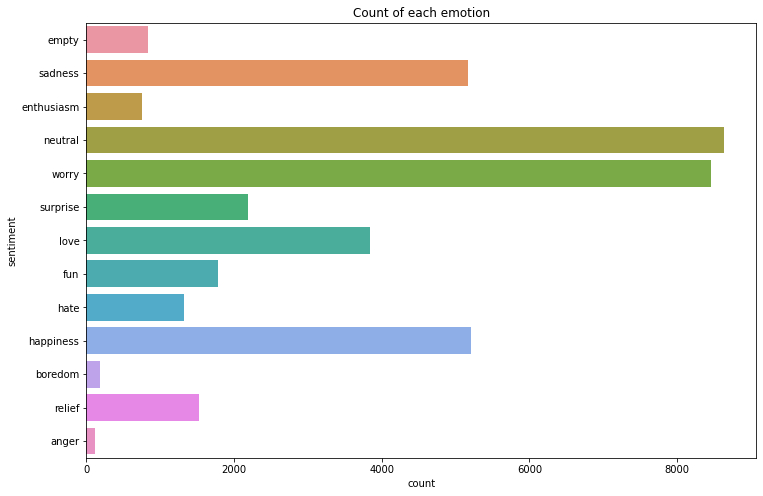

In [10]:
col = 'sentiment'
fig,ax1  = plt.subplots(nrows=1, ncols=1, figsize=(12,8))

explode = list((np.array(list(df[col].dropna().value_counts()))/sum(list(df[col].dropna().value_counts())))[::-1])
labels = list(df[col].dropna().unique())
sizes = df[col].value_counts()
sns.countplot(y =col, data = df, ax=ax1)
ax1.set_title("Count of each emotion")
plt.show()

In [11]:
display(df[col].dropna().value_counts())

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

# Cleaning the dataset
- removing na
- remove empty

# Categories

## Main
- Neutral
- Worry
- Happiness
- Sadness
- Love

## Positive
- Surprise
- Fun
- Relief
- Enthusiasm

## Negative
- Hate
- Boredom
- Anger

In [12]:
df_pos = df.loc[ (df[col] == 'surprise') | (df[col] == 'fun') | (df[col] == 'releif') | (df[col] =='enthusiasm')  ].copy()
df_pos[col] = "positive"
df_neg = df.loc[ (df[col] == 'hate' ) | (df[col] == 'boredom') | (df[col] == 'anger') ].copy()
df_neg[col] = "negative"

df2 = pd.concat([df_pos,df_neg,df.loc[ df[col] == 'neutral'],df.loc[ df[col] == 'worry'],df.loc[ df[col] == 'happiness'],df.loc[ df[col] == 'sadness'], df.loc[ df[col] == 'love'] ]  )


display(df2)

,tweet_id,sentiment,content
3,1956967789,positive,wants to hang out with friends SOON!
14,1956970860,positive,Got the news
21,1956972097,positive,"Wondering why I'm awake at 7am,writing a new s..."
41,1956977187,positive,@DavidArchie &lt;3 your gonna be the first tw...
56,1956981427,positive,"bed...sorta. today was good, sara has strep th..."
...,...,...,...
39974,1753904674,love,to my pretty lady @nikkiwoods HAPPY MOTHER'S D...
39989,1753918822,love,His snoring is so annoying n it keeps me from ...
39996,1753919001,love,Happy Mothers Day All my love
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...


In [13]:
df2[col].unique()

array(['positive', 'negative', 'neutral', 'worry', 'happiness', 'sadness',
       'love'], dtype=object)

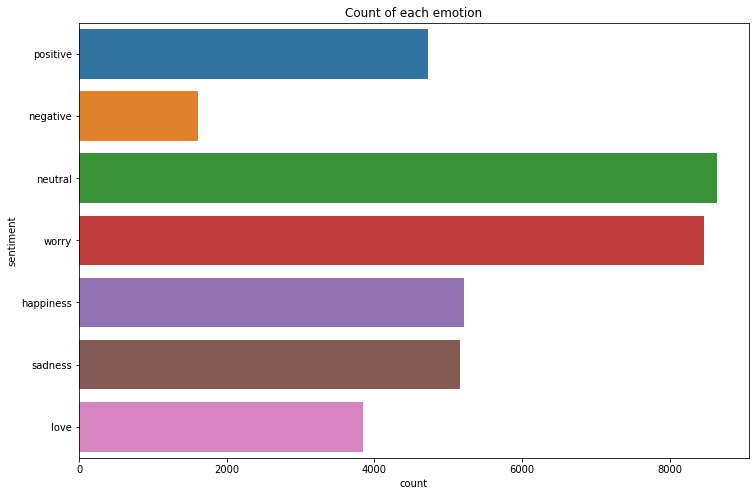

In [14]:
fig,ax1  = plt.subplots(nrows=1, ncols=1, figsize=(12,8))
explode = list((np.array(list(df2[col].dropna().value_counts()))/sum(list(df2[col].dropna().value_counts())))[::-1])
labels = list(df2[col].dropna().unique())
sizes = df2[col].value_counts()
sns.countplot(y =col, data = df2, ax=ax1)
ax1.set_title("Count of each emotion")
plt.show()

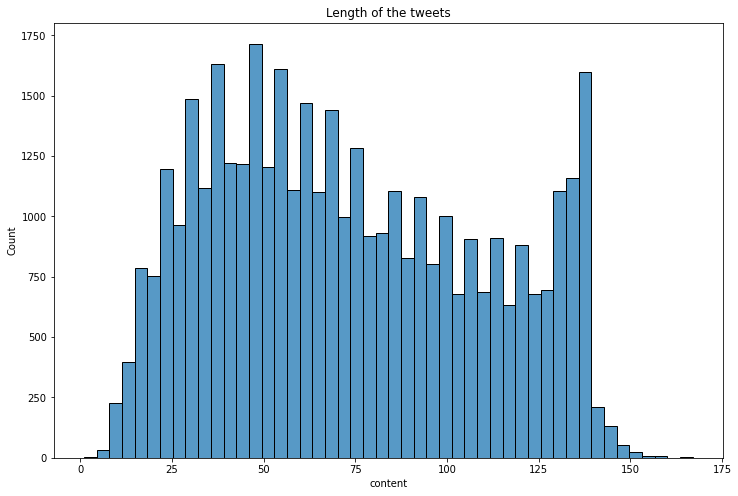

In [15]:
fig,ax1  = plt.subplots(nrows=1, ncols=1, figsize=(12,8))
text_len = df['content'].apply(lambda x: len(x))
sns.histplot(text_len, ax=ax1)
ax1.set_title("Length of the tweets")
plt.show()

# Text Pre-processing

- Remove html & Links
- Emojis to text
- Remove non-ascii chars
- Lower
- Remove stopwords
- Remove mentions
- Normalize hashtag
- contaction don't => do not
- Lemitization
- Stemming ??

In [16]:
from bs4 import BeautifulSoup
import re
import spacy   
import pandas as pd



# Removing html code
def remove_html(text):
    soup = BeautifulSoup(text, "html.parser")
    txt = soup.get_text()
    txt = txt.strip(',."!?:;()\'')
    return re.sub(r"http\S+", "", txt ); # removing URLs too


# Replace emoji
# Loading emoji csv file with mapping
df = pd.read_csv('./data/proj/emoji.csv',header=None,names=['emoji','sentiment'])
skp = [".",",",">","<",")","(","?","*","+","=","-","\\","/","[","]"]


def replace_emoji(txt):
    lst = re.findall(r'[^\w\s,]', txt)
    
    for e in lst:
        if (e in skp): continue;
        res = df.loc[ df['emoji'].str.contains(e)]
        if(len(res) == 0): continue;
        res = res.iloc[0]
        txt = txt.replace(e,'<'+str(res['sentiment']+'>'))
    return txt;
  

# Remove non-ascii code
def remove_nonascii(text):
    return text.encode("ascii", "ignore").decode().lower() 


# Removing Stopwords
 
nlp = spacy.load("en_core_web_sm")
stop_words = nlp.Defaults.stop_words

def remove_stopwords(txt):
        words = txt.lower().split(' ')
        new_words = []
        for word in words:
            if word not in stop_words:
                new_words.append(word)
        return " ".join(new_words).strip();

    
# Removing mentions & nornalizing hashtags
def remove_mention(txt):
    return re.sub("@[A-Za-z0-9]+","", txt).strip().replace("#","").replace("_"," ");


# replace contractions
def decontracted(txt):
    # specific
    txt = re.sub(r"won\'t", "will not", txt)
    txt = re.sub(r"can\'t", "can not", txt)

    # general
    txt = re.sub(r"n\'t", " not", txt)
    txt = re.sub(r"\'re", " are", txt)
    txt = re.sub(r"\'s", " is", txt)
    txt = re.sub(r"\'d", " would", txt)
    txt = re.sub(r"\'ll", " will", txt)
    txt = re.sub(r"\'t", " not", txt)
    txt = re.sub(r"\'ve", " have", txt)
    txt = re.sub(r"\'m", " am", txt)
    return txt


# lemmatization with spacy

def lemmatizer(txt):
    doc = nlp(txt);
    res = [];
    for w in doc:
        res.append(w.lemma_)
    return " ".join(res).strip()



def clean_text(row):
    txt = row['content']
    txt = remove_html(txt);
    txt = replace_emoji(txt);
    txt = remove_nonascii(txt);
    txt = remove_stopwords(txt);
    txt = remove_mention(txt);
    txt = decontracted(txt);
    txt = lemmatizer(txt);
    row['content'] = txt
    return row;
    


#display(df2.apply( lambda x: print(x['content']),axis=1 ))

df_clean = df2.apply( lambda x: clean_text(x) ,axis=1 )
df_clean = df_clean.dropna() # drop null values

display(df_clean)



KeyboardInterrupt: 

In [ ]:
df_clean.to_csv('./data/proj/clean_dataset.csv')

In [1]:
import pandas as pd
df = pd.read_csv('./data/proj/clean_dataset.csv')
df = df.dropna()
display(df)

,Unnamed: 0,tweet_id,sentiment,content
0,3,1956967789,positive,want hang friend soon
1,14,1956970860,positive,get news
2,21,1956972097,positive,"wonder I be awake 7am , write new song , plot ..."
3,41,1956977187,positive,<3 gon na twitter ;) cause amazing lol . com...
4,56,1956981427,positive,"bed ... sorta . today good , sara strep think ..."
...,...,...,...,...
37642,39974,1753904674,love,pretty lady happy mother be day ! ! ! she be...
37643,39989,1753918822,love,"snore annoying n keep sleep ( like right now ,..."
37644,39996,1753919001,love,happy mother day love
37645,39997,1753919005,love,"happy mother be day mommy there , woman man lo..."


In [4]:
# Replacing the labels

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder();
col = 'sentiment'


df[col] = le.fit_transform(df[col])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Our Mapped Labels ", le_name_mapping)

df = df.dropna()
display(df)


Our Mapped Labels  {'happiness': 0, 'love': 1, 'negative': 2, 'neutral': 3, 'positive': 4, 'sadness': 5, 'worry': 6}


,Unnamed: 0,tweet_id,sentiment,content
0,3,1956967789,4,want hang friend soon
1,14,1956970860,4,get news
2,21,1956972097,4,"wonder I be awake 7am , write new song , plot ..."
3,41,1956977187,4,<3 gon na twitter ;) cause amazing lol . com...
4,56,1956981427,4,"bed ... sorta . today good , sara strep think ..."
...,...,...,...,...
37642,39974,1753904674,1,pretty lady happy mother be day ! ! ! she be...
37643,39989,1753918822,1,"snore annoying n keep sleep ( like right now ,..."
37644,39996,1753919001,1,happy mother day love
37645,39997,1753919005,1,"happy mother be day mommy there , woman man lo..."


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm,naive_bayes
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import numpy as np


train_text, test_text, train_label,test_label = train_test_split(df['content'],df['sentiment'],test_size=.3,random_state=555,shuffle=True)


vector = TfidfVectorizer()
training_vector = vector.fit_transform(train_text)

classifier = svm.LinearSVC()
classifier.fit(training_vector,train_label)

test_matrix = vector.transform(test_text)
test_prediction = classifier.predict(test_matrix)

correct_answers = np.sum(np.equal(test_prediction, test_label))


print(f1_score(test_label, test_prediction, average="macro")*100)
print(precision_score(test_label, test_prediction, average="macro")*100)
print(recall_score(test_label, test_prediction, average="macro")*100)  

# confusion_matrix(test_label,test_prediction)

print(classification_report(test_label,test_prediction))


29.85207916584428
31.044328567744156
29.346828964538545
              precision    recall  f1-score   support

           0       0.32      0.33      0.33      1592
           1       0.41      0.36      0.38      1166
           2       0.28      0.18      0.22       461
           3       0.34      0.41      0.37      2542
           4       0.18      0.13      0.16      1413
           5       0.29      0.25      0.27      1553
           6       0.34      0.40      0.37      2507

    accuracy                           0.32     11234
   macro avg       0.31      0.29      0.30     11234
weighted avg       0.32      0.32      0.32     11234



In [7]:
classifier = naive_bayes.GaussianNB()

classifier.fit(training_vector.toarray(),train_label)

test_predict2 = classifier.predict(test_matrix.toarray())

correct_answers = np.sum(np.equal(test_predict2, test_label))
accuracy = correct_answers / (len(test_predict2)*1.0) * 100
print("Naive Bayes Accuracy = ",accuracy)


print(f1_score(test_label, test_predict2, average="macro")*100)
print(precision_score(test_label, test_predict2, average="macro")*100)
print(recall_score(test_label, test_predict2, average="macro")*100)  

print(classification_report(test_label,test_prediction))


Naive Bayes Accuracy =  13.236603168951397
13.471369817035109
17.252099402791007
17.081889577594257
              precision    recall  f1-score   support

           0       0.32      0.33      0.33      1592
           1       0.41      0.36      0.38      1166
           2       0.28      0.18      0.22       461
           3       0.34      0.41      0.37      2542
           4       0.18      0.13      0.16      1413
           5       0.29      0.25      0.27      1553
           6       0.34      0.40      0.37      2507

    accuracy                           0.32     11234
   macro avg       0.31      0.29      0.30     11234
weighted avg       0.32      0.32      0.32     11234



In [8]:
# using spacy vectors as input

import spacy

# download the package first python -m spacy download en_core_web_sm 
nlp = spacy.load("en_core_web_sm")


# Converting the training and test sets into spacy vectors
# Looping over the trining set
vec_train = []
for sentence in train_text:
    vec_train.append(nlp(sentence).vector);
    
# Looping over the test set
vec_test = []
for sentence in test_text:
    vec_test.append(nlp(sentence).vector)
    


In [9]:
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier(hidden_layer_sizes=(3,),activation='logistic')
classifier.fit(vec_train,train_label)

# predict the test classess
test_prediction = classifier.predict(vec_test)

print(classification_report(test_label,test_prediction))

              precision    recall  f1-score   support

           0       0.26      0.19      0.22      1592
           1       0.36      0.15      0.21      1166
           2       0.00      0.00      0.00       461
           3       0.31      0.47      0.38      2542
           4       0.00      0.00      0.00      1413
           5       0.00      0.00      0.00      1553
           6       0.26      0.61      0.37      2507

    accuracy                           0.28     11234
   macro avg       0.17      0.20      0.17     11234
weighted avg       0.20      0.28      0.22     11234



/home/ashraf/code/master/nlp/proj1/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ashraf/code/master/nlp/proj1/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ashraf/code/master/nlp/proj1/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

In [18]:
classifier = svm.LinearSVC()
# classifier.fit(trained_vectors,train_label)
classifier.fit(vec_train,train_label)

#test_matrix = vector.transform(test_text)
#test_prediction = classifier.predict(test_matrix)

test_prediction = classifier.predict(vec_test)

print(classification_report(test_label,test_prediction))

              precision    recall  f1-score   support

           0       0.27      0.16      0.20      1592
           1       0.42      0.13      0.20      1166
           2       0.00      0.00      0.00       461
           3       0.31      0.51      0.38      2542
           4       0.18      0.01      0.02      1413
           5       0.28      0.01      0.03      1553
           6       0.26      0.59      0.36      2507

    accuracy                           0.29     11234
   macro avg       0.25      0.20      0.17     11234
weighted avg       0.27      0.29      0.22     11234



/home/ashraf/code/master/nlp/proj1/env/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
